# Basic CNN for pothole detection using Fastai

The packages we'll need. Note, the repo includes a `env.yml` file so you can recreate the environment I used to experiment in by running `conda env create -f env.yml` or you can just install fastai with `conda install -c pytorch -c fastai fastai` and it will install everything you need to run this notebook.

In [2]:
from pathlib import Path

from fastai.callbacks import SaveModelCallback
from fastai.metrics import accuracy
from fastai.train import ClassificationInterpretation
from fastai.vision.data import ImageList
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet18
from fastai.vision.transform import ResizeMethod, get_transforms

The first part of this notebook is a walkthrough of a very simple solution using minimal code. Thereafter, we add some details and hints on how the basic version can be improved.

## Basic version

### Data

The first thing we want to do is create a fastai databunch. This object contains all the information on how we want the data to be retrieved and processed before it gets sent to the model and optimiser. In this challenge we are dealing with image. *Insert info on the images here*.

The things we want to specify in the databunch are:

- where are the images?
- which of them do we want to use for training and which for testing?
- how should the images be labelled?
- what transforms and other preprocessing should be applied to the images before it is passed to the model?
- how big should the batches be?

All of this is done in the cell below:

In [3]:
path = Path('data')
il = ImageList.from_folder(path) # depends on Zindi
sd = il.split_by_folder(valid='test') # depends on Zindi
ll = sd.label_from_folder() # depends on Zindi
ll = ll.transform(get_transforms(), size=224)
data = ll.databunch(bs=32)

The databunch looks like this:

In [6]:
data

ImageDataBunch;

Train: LabelList (4026 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
negative,negative,negative,negative,negative
Path: data;

Valid: LabelList (1650 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
negative,negative,negative,negative,negative
Path: data;

Test: None

Inspect the interim objects to get a better idea what happened at each of the steps, *e.g.* the image list:

In [9]:
il

ImageList (5676 items)
Image (3, 600, 800),Image (3, 600, 800),Image (3, 600, 800),Image (3, 600, 800),Image (3, 600, 800)
Path: data

Now we can look at a batch of data:

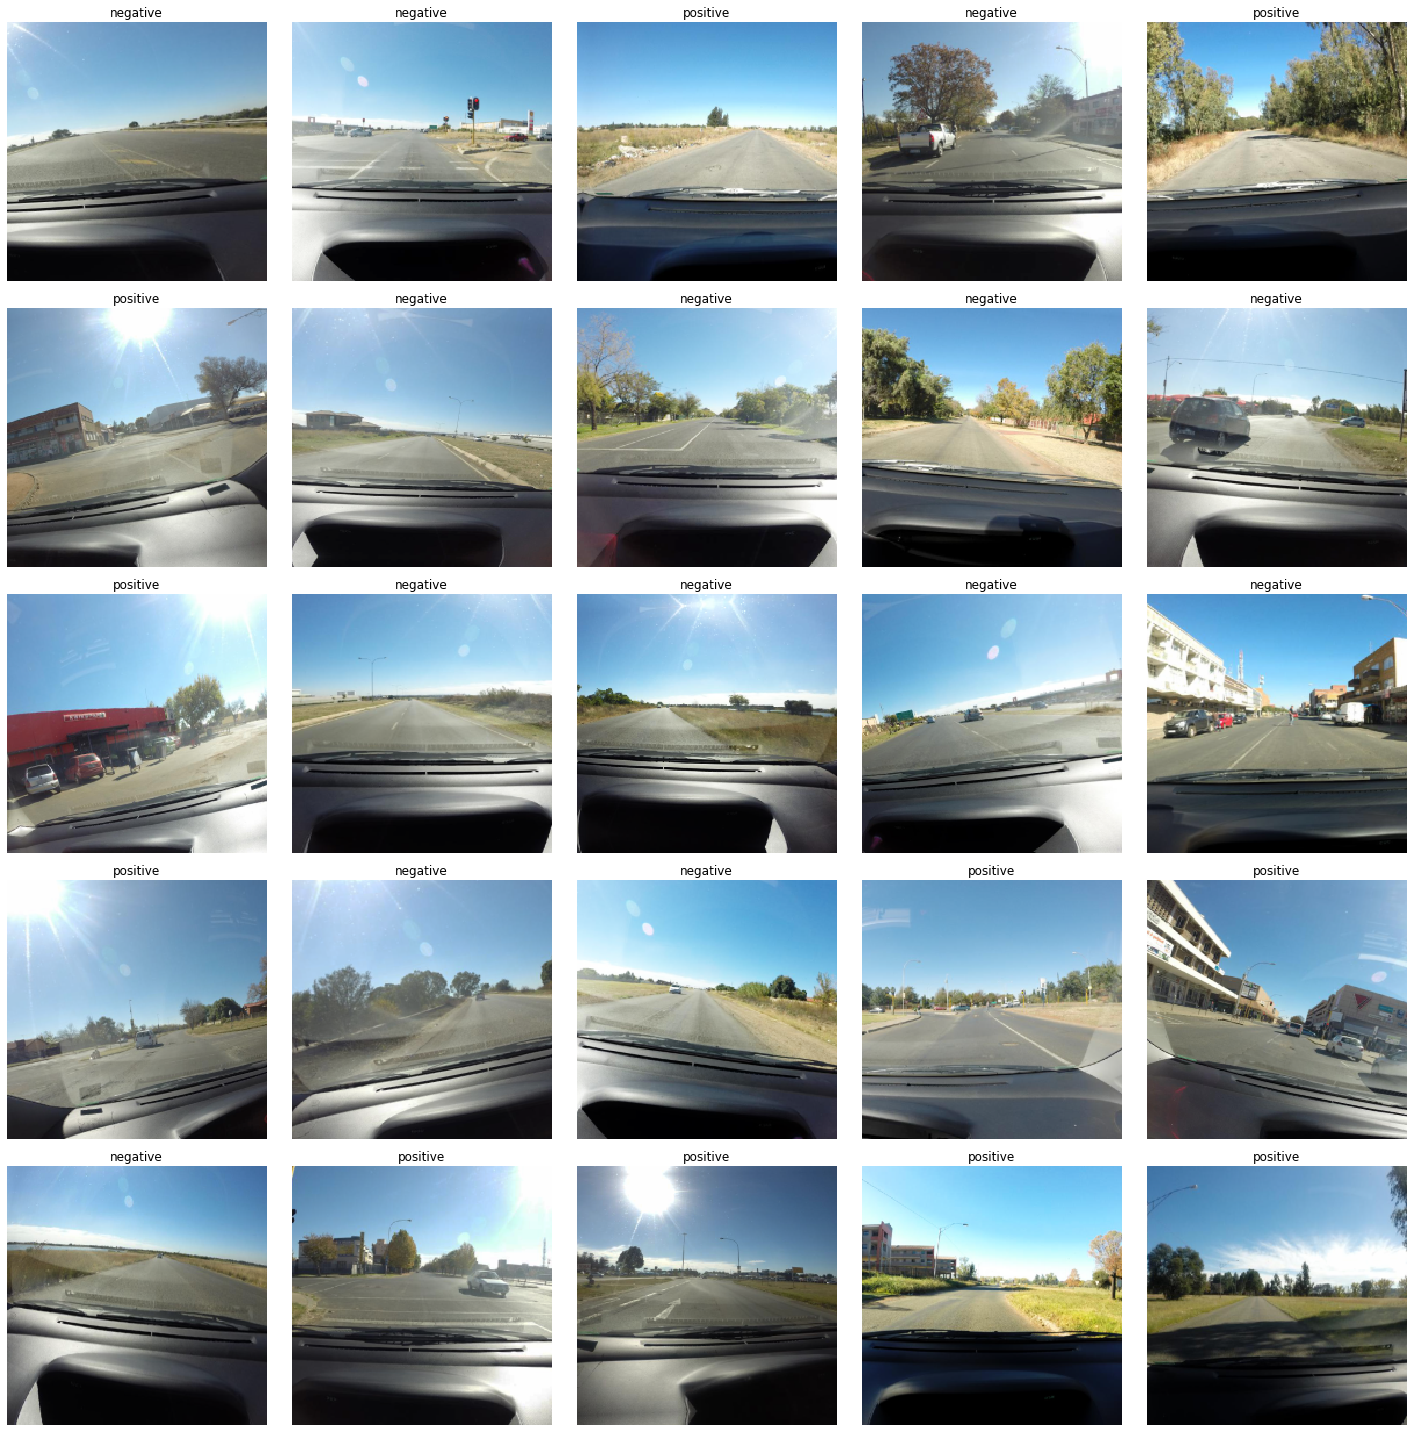

In [4]:
data.show_batch()

### Model

In [0]:
# create a learner object with ResNet18 model and adam optimiser (default)
# https://github.com/LiyuanLucasLiu/RAdam
# https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer?source=post_page-----2dc83f79a48d----------------------
learn = cnn_learner(data, resnet18, metrics=accuracy, ps=0.5, opt_func=Ranger)
learn = learn.mixup()

# find good learning rate
learn.lr_find()
learn.recorder.plot()

# save best model

learn.fit_one_cycle(10, 1e-2,
learn.save('pre')

preds, y = learn.TTA()
preds, y = learn.get_preds()

accuracy(preds, y)

learn.unfreeze()

learn.lr_find()
learn.recorder.plot()

learn.fit_one_cycle(3, slice(1e-5, 1e-4))